In [1]:
from env import generate_url

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 

In [3]:
url = generate_url()

In [8]:
list(pd.read_sql('SHOW DATABASES;',url)['Database'])

['information_schema',
 'ada_671',
 'ada_students',
 'albums_db',
 'chipotle',
 'elo_db',
 'employees',
 'fruits_db',
 'iris_db',
 'join_example_db',
 'mall_customers',
 'mysql',
 'numbers',
 'quotes_db',
 'sakila',
 'svi_db',
 'telco_churn',
 'titanic_db',
 'tsa_item_demand',
 'world',
 'zillow']

In [9]:
dburl = generate_url('mall_customers')

In [10]:
pd.read_sql("SHOW TABLES", dburl)

,Tables_in_mall_customers
0,customers


## Grabs DF

In [59]:
df = pd.read_sql("SELECT * FROM customers", dburl)

In [52]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


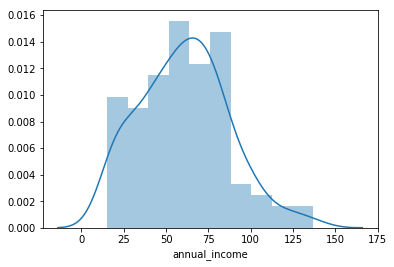

In [18]:
sns.distplot(df.annual_income)

In [25]:
q3 = df.annual_income.quantile(q=.75)

In [26]:
q1 = df.annual_income.quantile(q=.25)

In [27]:
iqr = q3 - q1 

In [28]:
iqr_scaled = iqr * 1.5

In [30]:
iqr_scaled - q1

13.25

In [31]:
q3 + iqr_scaled

132.75

In [32]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customer_id       200 non-null int64
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
def encode_gender(df):
    encoder = LabelEncoder()
    encoder.fit(df.gender)
    return df.assign(gender = encoder.transform(df.gender))

In [66]:
encode_gender(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customer_id       200 non-null int64
gender            200 non-null int64
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(5)
memory usage: 7.9 KB


In [65]:
df


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [49]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72
